In [33]:
# Basic imports
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('data.csv')

print('Percentage of null titles: {} %'.format(df['title'].isnull().values.sum()*100/df.shape[0]))

# Remove missing title values.    
df = df[df['title'].notna()]

titles = df['title'].unique()
print('Unique titles: ', titles)

# Join titles in a big string and import tokenize functions
big_title_string = ' '.join(titles)
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the string into words
tokens = word_tokenize(big_title_string)
# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]
# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Print first 100 words
print(words[:100])

In [37]:
# Import word2vec embedding from glove-wiki-gigaword-300 corpus
import smart_open
smart_open.open = smart_open.smart_open
from gensim.models import Word2Vec, KeyedVectors

import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-300')

# Check similar words
wv.most_similar("consolidation")

/Users/marceca/Ixpandit_project/envs/lib/python3.7/site-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('restructuring', 0.6043006777763367),
 ('mergers', 0.5810532569885254),
 ('reorganization', 0.5566129684448242),
 ('consolidating', 0.5526822805404663),
 ('merger', 0.5364637970924377),
 ('deregulation', 0.5317937731742859),
 ('consolidate', 0.5216856598854065),
 ('expansion', 0.5165098905563354),
 ('consolidations', 0.5059775710105896),
 ('privatization', 0.5037057995796204)]

## Word2vec + k-means to assign titles to clusters (partial run)

In [38]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [wv[word] for word in words[0:100] if word in wv.index_to_key]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words[0:100] if word in wv.index_to_key]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
dft = pd.DataFrame.from_dict(word_vec_dict, orient='index')
print(dft.head(3))

X = dft.to_numpy()

import numpy as np
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

data_top = dft.head(60)
for idx, row in enumerate(data_top.index):
    print('{}: {}'.format(row, assigned_clusters[idx]), end = " ")

result = np.where(np.asarray(assigned_clusters) == 2)[0]

print('\n\n')

data_top = dft.head(60)
for idx, row in enumerate(data_top.index):
    if idx not in result:
        continue
    print('{}: {}'.format(row, assigned_clusters[idx]), end = " ")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
debt,-0.193600,-0.12332,-0.067227,0.25084,0.198990,-0.043930,0.24389,0.10015,-0.20046,-2.0145,0.135120,0.496570,0.108890,-0.15184,0.054571,-0.32059,-0.096794,-0.50955,0.351450,-0.634530,-0.327040,0.107960,0.22492,0.32237,0.480300,0.558310,0.31961,0.06068,0.047814,0.40554,-0.57951,0.30294,0.015328,-0.42477,-1.25000,-0.47888,-0.326260,0.156450,-0.30910,-0.212340,-0.384030,-0.555590,-0.470360,0.39537,0.65839,-0.047685,0.033162,-0.066237,-0.409100,-0.32196,0.189880,0.065268,-0.35419,-0.31367,0.056604,-0.320500,-0.125300,0.98852,-0.251850,-0.19869,0.59768,-0.000989,-0.070705,-0.245990,-0.193110,-0.180880,0.077787,0.25634,0.18101,-0.28983,0.187760,0.71179,-0.33798,0.14078,-0.21290,-0.815540,0.19112,0.016218,0.46375,-0.598750,0.074805,-0.41537,0.40633,-0.262660,0.91196,0.38504,-0.021679,0.21910,-0.64203,0.278260,0.23810,0.106650,-0.64322,-0.24458,0.345800,-0.52220,-0.54342,0.002028,0.20640,0.004573,-0.10226,-0.216340,0.267060,0.004714,0.153830,0.21020,-0.54078,0.042549,-0.293590,0.251760,-0.36108,-0.36595,-0.374720,0.050281,0.49884,-0.245390,0.569840,0.147030,0.484990,-0.42334,0.40612,-0.404820,-0.54221,0.653330,-0.044308,0.43137,0.19092,-0.229850,-0.442810,0.72339,0.591740,0.43066,0.53327,-0.30409,0.11727,0.038566,-0.32440,0.47863,-0.29008,-0.922320,-0.62871,-0.362730,0.69930,0.172270,0.23872,0.28245,-0.565190,-0.376500,0.226390,-0.440730,0.14268,-0.043678,-0.178810,0.097722,-0.24101,0.896210,0.053673,-0.28739,-0.258240,-0.090889,0.177120,0.146880,0.173420,0.34956,-0.063399,-0.587930,0.54112,0.061469,0.14664,0.05890,-0.167490,0.66572,0.093127,0.14239,-0.18255,-0.221700,-0.195190,0.23207,0.277130,1.70570,0.635900,-0.654580,-0.156000,-0.23520,0.24971,0.40310,-0.074793,-0.046851,-0.399870,0.50515,-0.42826,0.590950,-0.348580,0.220530,-0.206420,-0.35068,0.534660,0.23919,0.232740,-0.12055,0.25527,0.032972,0.120300,0.243540,0.59305,-0.261440,0.050634,-0.162320,0.538520,-0.085753,-0.084067,0.01607,-0.34987,-0.62156,0.314890,0.50976,-0.199050,-0.27259,0.031253,0.37980,0.279730,0.176430,-0.14964,0.088223,-0.15108,-0.14780,-0.047209,0.171470,-0.004575,-0.45752,-0.43760,0.25333,-0.512250,0.447750,0.113870,0.10265,0.11496,-0.119580,0.47331,-0.303680,0.769790,0.118940,0.99520,-0.523220,-1.06980,-0.005678,0.50878,-0.01336,0.45643,-0.12561,-0.54866,0.395510,0.481520,-0.145360,0.096485,-0.34043,-1.39810,0.52988,-0.18201,-0.017068,0.119970,0.37427,-0.167330,0.088168,0.070647,0.468650,0.903300,0.36345,-0.520560,-0.40640,0.37268,0.60879,-0.605220,0.46879,-0.084515,-0.178650,-1.04840,-0.533580,0.80840,-0.66441,0.53673,0.279900,-0.21783,-0.27489,0.33523,0.25690,-0.13995,-0.081054,0.146310,-0.538860,-0.206460,0.486380,0.006313,-0.44004,0.942930,0.23921,0.44758,0.18246,-0.412600,-0.42723
consolidation,-0.232140,-0.15192,-0.228640,-0.11082,0.792510,-0.363770,0.13904,0.27969,0.18049,-1.1293,-0.387370,0.462360,-0.011445,0.25424,0.528670,-0.57545,-0.024834,-0.44404,-0.263720,0.194250,0.0121

## Full run: pre-process data and transform sentences with word2vec 

In [41]:
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_title(title, wv):
     # Tokenize the string into words
    tokens = word_tokenize(title)
    # Remove non-alphabetic tokens, such as punctuation
    words = [word.lower() for word in tokens if word.isalpha()]
    # Filter out stopwords
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    
    # Include only those that Word2Vec has a vector for
    vector_filtered = [wv[word] for word in words if word in wv.index_to_key]
    # Create a list of the words corresponding to these vectors
    words_filtered = [word for word in words if word in wv.index_to_key]

    if len(vector_filtered):
        # Compute word2vec average for each sentence
        w2v_average = np.average(vector_filtered, axis=0)
    else: # It's a null sentence
        w2v_average = np.ones((300,))
    
    sentence = ' '.join(words_filtered)
    return w2v_average

[nltk_data] Downloading package punkt to /Users/marceca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marceca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# Get first 100000 titles
titles = df['title'][0:100000]

dataw = []
#For each title tokenize words, remove non-alphabetic tokens 
#and compute word2vec average for each sentence
for t in titles:
    word_vec = preprocess_title(t, wv)
    dataw.append(word_vec) 
    pass

In [45]:
dfw = pd.DataFrame(dataw)
dfw.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.212870,-0.137620,-0.147933,0.070010,0.495750,-0.203850,0.191465,0.189920,-0.009985,-1.571900,-0.126125,0.479465,0.048722,0.051200,0.291620,-0.448020,-0.060814,-0.476795,0.043865,-0.220140,-0.157454,0.061943,0.234825,0.291555,0.282052,0.243943,-0.093015,-0.073935,-0.010650,0.020655,-0.202675,-0.138485,0.177519,-0.021660,-0.992340,0.021125,-0.305040,0.108432,-0.232210,-0.126395,-0.230639,-0.422920,-0.119295,-0.022055,0.560485,-0.205563,-0.068069,0.014141,-0.193211,-0.379635,0.069841,-0.023061,-0.260075,-0.233430,0.467667,-0.148359,-0.142450,0.69083,0.078435,-0.045505,0.622855,-0.053229,-0.106932,-0.147646,-0.111793,0.219300,0.067209,-0.022875,0.208010,0.111955,0.048102,0.196290,-0.352485,-0.041895,0.207225,-0.533010,-0.208520,0.011114,0.098575,-0.159155,-0.194183,-0.333170,0.255480,-0.244620,0.866335,0.350880,-0.107184,0.229625,-0.402740,0.239635,0.277315,0.061809,-0.518640,-0.059560,0.203124,-0.445485,-0.502465,0.156729,-0.064795,0.165771,-0.248260,-0.063916,0.098508,-0.335078,-0.154080,0.225530,-0.450995,0.082954,-0.249860,0.334995,-0.301350,-0.593900,-0.412310,0.023636,0.367215,-0.300230,0.425380,0.109682,0.121045,-0.089150,0.513455,-0.285390,-0.145300,0.238670,0.234111,0.029645,0.184290,-0.117426,-0.237927,0.259010,0.554050,0.421545,0.403295,-0.275450,0.129845,0.055782,-0.418890,0.119295,0.044280,-0.493204,-0.413260,-0.154478,0.137045,0.121742,0.223465,0.010680,-0.488555,0.109775,0.055500,-0.183845,-0.106995,0.026558,-0.118718,0.104021,0.001900,0.443314,0.116041,-0.091595,-0.592780,0.026976,0.071891,-0.007150,-0.140360,0.263065,-0.069496,-0.253166,0.439700,0.157100,-0.171380,0.413670,0.169495,0.478315,0.158123,-0.036090,-0.282870,-0.105963,-0.415225,0.086855,0.119036,1.007600,0.307975,-0.412805,-0.071030,-0.428565,0.364885,0.302100,-0.253731,0.052294,-0.224628,0.504650,-0.289775,0.268332,-0.219088,-0.083215,-0.056814,0.093115,0.259189,0.06590,0.071774,-0.069285,-0.012835,-0.040489,0.046207,-0.178445,0.116120,-0.090314,-0.157733,-0.105432,0.501270,-0.108467,0.061962,0.062590,-0.28302,-0.131745,0.205610,0.444980,-0.122012,0.056860,0.151487,0.093015,0.112953,0.050798,-0.293685,0.000225,-0.136215,-0.012380,0.035636,0.089481,0.393792,-0.380810,-0.403520,0.352280,-0.293613,0.363020,0.009343,-0.078520,0.177980,-0.231940,0.337505,-0.191653,0.448665,0.088141,0.532880,-0.303302,-1.020775,-0.141124,0.520750,-0.181055,0.528710,0.005140,-0.216160,0.449200,0.241257,-0.044981,-0.165178,-0.073705,-0.638320,0.318815,-0.072680,0.260416,0.342225,0.455485,-0.027850,0.213034,0.254054,0.222793,0.088295,0.339960,-0.110790,-0.300930,0.259395,0.378515,-0.592915,0.082925,0.249362,-0.073281,-0.886715,-0.246463,0.681820,-0.593165,0.007530,0.177327,-0.222590,-0.244390,0.381245,-0.091095,0.113400,-0.126247,0.110845,-0.409305,-0.069831,0.432145,-0.032020,-0.321540,0.618205,0.488770,0.129825,-0.079230,-0.096820,-0.400720
1,0.009701,0.250980,0.223380,-0.464830,-0.037214,-0.091608,-0

## Full run: perform k-means on averaged word2vec sentences

In [46]:
import numpy as np
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5

# Convert dataframe to numpy
X = dfw.to_numpy()

# Find clusters with k-means
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25, 
                             avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

In [48]:
dfsub = df[0:dfw.shape[0]]
dfsub['title_clusters'] = assigned_clusters
dfsub[['title', 'title_clusters']].head(10)

/Users/marceca/Ixpandit_project/envs/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,title_clusters
0,Debt consolidation,1
1,Business,3
3,Major purchase,3
4,Debt consolidation,1
5,Debt consolidation,1
6,Major purchase,3
7,Credit card refinancing,0
8,Credit card refinancing,0
10,Debt consolidation,1
11,Debt consolidation,1


## Plot results

In [49]:
# Re-define function from 1st assignement
def plot_bar (colname, df, set_xrange=False, xrange=(0,0), figsize=(9,3), sort=False, rotate=False):
    
    # Split the data in positive and negative classes 
    df_pos = df.loc[df['loan_status']=='Fully Paid']
    df_neg = df.loc[df['loan_status']=='Charged Off']

    # Get features associated with the positive class
    pos_feature = df_pos[colname].value_counts()
    norm_pos_feature = {d:pos_feature[d]/sum(pos_feature.values) for d in dict(pos_feature)}

    # Get features associated with the negative class
    neg_feature = df_neg[colname].value_counts()
    norm_neg_feature = {d:neg_feature[d]/sum(neg_feature.values) for d in dict(neg_feature)}
    
    if sort:
        from datetime import datetime
        from dateutil import parser
        
        date_list = ['{}-{}'.format(parser.parse(dt).month, parser.parse(dt).year) for dt in 
                     list(norm_pos_feature.keys())]
        tmp = [datetime.strptime(dt, "%m-%Y") for dt in date_list]
        sort_indices = sorted(range(len(tmp)), key=lambda k: tmp[k])
        pos_keys = np.asarray(list(norm_pos_feature.keys()))[sort_indices]
        pos_values = np.asarray(list(norm_pos_feature.values()))[sort_indices]
        
        date_list = ['{}-{}'.format(parser.parse(dt).month, parser.parse(dt).year) for dt in 
                     list(norm_neg_feature.keys())]
        tmp = [datetime.strptime(dt, "%m-%Y") for dt in date_list]
        sort_indices = sorted(range(len(tmp)), key=lambda k: tmp[k])
        neg_keys = np.asarray(list(norm_neg_feature.keys()))[sort_indices]
        neg_values = np.asarray(list(norm_neg_feature.values()))[sort_indices]
    else:
        pos_keys = norm_pos_feature.keys()
        pos_values = norm_pos_feature.values()
        neg_keys = norm_neg_feature.keys()
        neg_values = norm_neg_feature.values()
    
    # Plot probability density distributions for both classes
    fig, axs = plt.subplots(1,1, figsize=figsize)
    axs.bar(pos_keys, pos_values, alpha=0.5, label='Paid')
    axs.bar(neg_keys, neg_values, alpha=0.5, label='Not paid')
    axs.legend()
    if set_xrange:
        axs.set_xlim(xrange[0],xrange[1])
    if rotate:
        plt.xticks(rotation=90)
    plt.title('{} p.d.f'.format(colname))

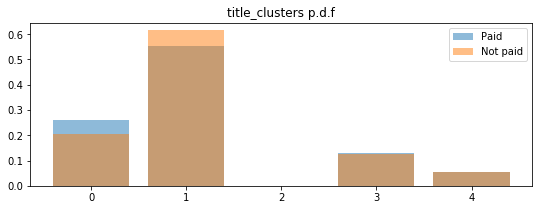

In [50]:
plot_bar('title_clusters', dfsub.copy())

* As it can be seen, we can extract useful information from 1st and 2nd clustes. The same analysis could be done for 'emp_title'